In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
import seaborn as sns
%matplotlib inline

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from warnings import filterwarnings
filterwarnings("ignore")

In [ ]:
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc,plot_roc_curve
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,fbeta_score,matthews_corrcoef
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix

In [ ]:
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectFwe, f_regression

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
dataset = pd.read_csv('Heart_Disease_Prediction.csv',sep=',',encoding="utf-8")
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,1
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,1
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,1
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,1


In [ ]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset2[columns_to_scale] = standardScaler.fit_transform(dataset2[columns_to_scale])

NameError: ignored

In [ ]:
dataset2.head()

In [ ]:
X=dataset.iloc[:,0:13].values
Y=dataset.iloc[:,13:14].values

In [ ]:
X.shape

(270, 13)

In [ ]:
Y.shape

(270, 1)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print("Training features have {0} records and Testing features have {1} records.".\
      format(X_train.shape[0], X_test.shape[0]))

Training features have 216 records and Testing features have 54 records.


In [ ]:
print('--------------Training Set----------------')
print(X_train.shape)
print(Y_train.shape)
print('----------------Test Set------------------')
print(X_test.shape)
print(Y_test.shape)

--------------Training Set----------------
(216, 13)
(216, 1)
----------------Test Set------------------
(54, 13)
(54, 1)


In [ ]:
max_accuracy = 0

for x in range(500):
    rf_classifier = RandomForestClassifier(random_state=x)
    rf_classifier.fit(X_train,Y_train)
    Y_pred_rf = rf_classifier.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

print(max_accuracy)
print(best_x)

85.19
135


In [ ]:
rf_classifier = RandomForestClassifier(random_state=best_x)
rf_classifier.fit(X_train,Y_train)
Y_pred_rf = rf_classifier.predict(X_test)
Y_pred_rf.shape

(54,)

In [ ]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
score_rf
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,1
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,1
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,1
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,1


,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Random Forest,0.851852,0.866667,0.866667,0.866667,0.866667,0.85,19.188653,0.7


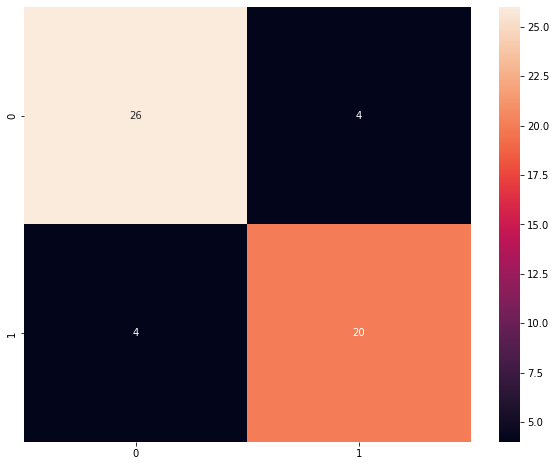

In [ ]:
y_pred_rfe = rf_classifier.predict(X_test)

plt.figure(figsize=(10, 8))
CM=confusion_matrix(Y_test,y_pred_rfe)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(Y_test, y_pred_rfe)
acc= accuracy_score(Y_test, y_pred_rfe)
roc=roc_auc_score(Y_test, y_pred_rfe)
prec = precision_score(Y_test, y_pred_rfe)
rec = recall_score(Y_test, y_pred_rfe)
f1 = f1_score(Y_test, y_pred_rfe)

mathew = matthews_corrcoef(Y_test, y_pred_rfe)
model_results =pd.DataFrame([['Random Forest',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results

In [ ]:
Y_pred_rf = np.around(Y_pred_rf) 
print(metrics.classification_report(Y_test,Y_pred_rf))

              precision    recall  f1-score   support

           1       0.87      0.87      0.87        30
           2       0.83      0.83      0.83        24

    accuracy                           0.85        54
   macro avg       0.85      0.85      0.85        54
weighted avg       0.85      0.85      0.85        54



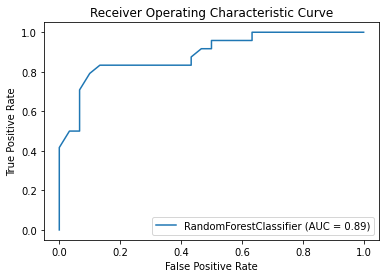

In [ ]:
plot_roc_curve(rf_classifier,X_test,Y_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve');
plt.savefig("RF.png")

In [ ]:
s_pred = rf_classifier.predict([[57,1,2,124,261,0,0,141,0,0.3,1,0,7]])
if(int(s_pred)==2):
  op="Present"
else:
  op="Absent"
print("Predicted Heart condition:",op) 

Predicted Heart condition: Present


In [ ]:
import joblib

In [ ]:
joblib.dump(rf_classifier, 'rf_class')

['rf_class']